# Unsupervised Learning in Python

Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. Or perhaps you have a set of texts, such as wikipedia pages, and you wish to segment them into categories based on their content. This is the world of unsupervised learning, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data. Unsupervised learning encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. In this course, you'll learn the fundamentals of unsupervised learning and implement the essential algorithms using scikit-learn and scipy. You will learn how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the course by building a recommender system to recommend popular musical artists.

## Clustering for dataset exploration

Learn how to discover the underlying groups (or "clusters") in a dataset. By the end of this chapter, you'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.

In [14]:
# load data

import pandas as pd
import numpy as np

points_read = pd.read_csv('points.csv')

new_points = np.array(points_read.iloc[:, 0:2])
points = np.array(points_read.iloc[:, 2:4])

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[2 2 0 0 2 1 0 2 2 2 2 2 1 0 1 2 2 1 2 1 0 0 2 1 1 1 1 1 2 1 0 0 2 0 2 1 0
 0 0 1 1 0 1 1 0 2 1 1 0 1 0 0 2 2 2 2 2 0 1 0 1 0 0 1 1 1 0 1 2 1 0 2 1 0
 0 0 2 0 0 0 2 2 0 2 0 1 1 0 0 0 0 0 1 0 2 1 2 2 2 1 0 2 0 1 1 1 2 1 1 0 0
 1 0 1 0 0 0 0 2 0 1 2 0 1 0 2 2 1 1 0 0 2 2 2 0 0 1 0 2 1 1 0 2 2 0 2 2 2
 2 1 0 0 0 1 1 1 2 2 2 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 2 0 2 1 2 2 0 2 1 2
 2 0 1 2 2 0 1 0 0 1 2 0 1 0 1 1 1 2 2 0 2 2 1 2 2 1 2 0 2 0 2 1 2 2 0 0 0
 2 1 1 1 1 1 0 2 2 0 0 1 1 1 1 0 2 2 0 0 0 1 1 2 1 1 2 1 1 1 1 0 0 0 2 1 1
 1 2 0 1 1 1 2 0 0 0 2 2 2 1 2 1 1 2 2 1 1 2 1 1 2 1 1 1 0 2 2 0 0 0 1 1 1
 0 0 2 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 2 2 0 2 1 1 1 0
 2 2 0 0 0 1 0 0 1 0 2 1 0 0 0 1 1 2 0 0 1 1 2 1 1 1 0 0 0 1 0 1 0 1 2 2 0
 2 0 1 2 2 1 1 0 0 0 2 1 0 2 2 1 0 0 2 2 0 0 0 0 2 1 2 1 2 2 1 1 2 2 1 2 0
 0 1 0 2 1 0 0 2 2 2 1 2 1 0 1 2 0 1 0 2 1 2 1 2 2 1 2 0 1 2 1 1 0 0 0 0 0
 1 1 2 0 2 1 0 1 2 2 0 1 2 1 0 0 0 0 1 1 2 2 1 0 0 0 2 1 2 2 1 2 1 2 1 0 1
 1 1 0 2 2 0 2 1 1 2 2 0 

### Inspect your clustering
Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

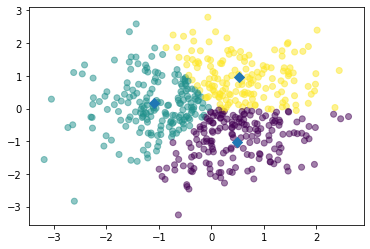

In [15]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, alpha = 0.5, c = labels)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker = 'D', s= 50)
plt.show()


### How many clusters of grain?
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?


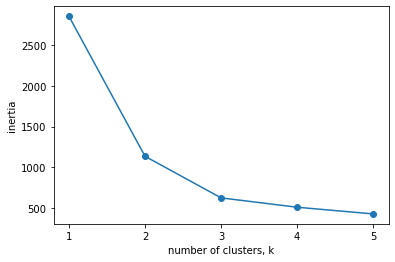

In [17]:
    # load data

    samples = pd.read_csv('seeds.csv')
    samples = samples.iloc[:,0:7]

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Scaling fish data for clustering
You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

In [32]:
# load data

samples_read = pd.read_csv('Fish measurements.csv', header=None)

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans =KMeans(n_clusters =4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

### Clustering the fish data
You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

In [37]:
# define data
samples = samples_read.iloc[:, 1:7]
species = samples_read.iloc[:, 0]

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1           33     0      1      0
2            1     0     19      1
3            0     0      0     13


### Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [39]:
# load data

movements = pd.read_csv('movements.csv', header=None)

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [41]:
stocks = pd.read_csv('Company stock price movements.csv')

companies = stocks.iloc[:, 0]

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
25       0                   Johnson & Johnson
41       0                       Philip Morris
40       0                      Procter Gamble
56       0                            Wal-Mart
39       0                              Pfizer
9        0                   Colgate-Palmolive
54       0                            Walgreen
27       0                      Kimberly-Clark
44       1                        Schlumberger
30       1                          MasterCard
53       1                       Valero Energy
32       1                                  3M
35       1                            Navistar
12       1                             Chevron
10       1                      ConocoPhillips
8        1                         Caterpillar
57       1                               Exxon
13       1                   DuPont de Nemours
50       2  Taiwan Semiconductor Manufacturing
48       2                              Toyota
34       2   